In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
data = pd.read_csv('/content/drive/MyDrive/Soft Comp/Dataset 3.csv', engine = 'python')

data

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [69]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['sentiment'].value_counts(0))
data

0    8000
1    2314
Name: sentiment, dtype: int64


,tweets,sentiment
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [84]:
X = list()
Y = list()
for index, row in data.iterrows():
    X.append(str(getattr(row, "tweets")))
    Y.append(getattr(row, "sentiment"))

In [85]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2)

In [86]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(lower = False)

tokenizer.fit_on_texts(x_train)

In [87]:
convertToSeq = tokenizer.texts_to_sequences(x_train)

In [88]:
max_length_x_train = max([len(s.split()) for s in x_train])
x_train = tf.keras.preprocessing.sequence.pad_sequences(convertToSeq, maxlen=max_length_x_train , padding='post')

In [89]:
x_train.shape


(8251, 69)

In [90]:
convertToSeqTest = tokenizer.texts_to_sequences(x_test)
x_test = tf.keras.preprocessing.sequence.pad_sequences(convertToSeqTest , maxlen=max_length_x_train, padding='post')

In [91]:
x_test.shape

(2063, 69)

In [92]:
y_train = np.array(y_train)
y_test = np.array(y_test)
vocab_size = len(tokenizer.word_index) + 1

In [93]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# Building the CNN Model
model = Sequential()      # initilaizing the Sequential nature for CNN model

model.add(Embedding(vocab_size, 100, input_length=max_length_x_train))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(28, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [94]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 69, 100)           2312400   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 69, 64)            19264     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 34, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 34, 32)            6176      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 17, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 17, 28)            2716      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 8, 28)            

In [95]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 69, 100)           2312400   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 69, 64)            19264     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 34, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 34, 32)            6176      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 17, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 17, 28)            2716      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 8, 28)            

In [96]:
history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
33/33 - 6s - loss: 0.5656 - accuracy: 0.7592 - val_loss: 0.4142 - val_accuracy: 0.8366
Epoch 2/20
33/33 - 4s - loss: 0.3460 - accuracy: 0.8752 - val_loss: 0.1992 - val_accuracy: 0.9239
Epoch 3/20
33/33 - 4s - loss: 0.0850 - accuracy: 0.9710 - val_loss: 0.0713 - val_accuracy: 0.9806
Epoch 4/20
33/33 - 4s - loss: 0.0099 - accuracy: 0.9976 - val_loss: 0.0523 - val_accuracy: 0.9821
Epoch 5/20
33/33 - 4s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0435 - val_accuracy: 0.9864
Epoch 6/20
33/33 - 4s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0379 - val_accuracy: 0.9889
Epoch 7/20
33/33 - 4s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0429 - val_accuracy: 0.9879
Epoch 8/20
33/33 - 4s - loss: 9.5503e-04 - accuracy: 0.9996 - val_loss: 0.0377 - val_accuracy: 0.9903
Epoch 9/20
33/33 - 4s - loss: 8.2112e-04 - accuracy: 0.9998 - val_loss: 0.0516 - val_accuracy: 0.9845
Epoch 10/20
33/33 - 4s - loss: 7.2635e-04 - accuracy: 0.9998 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 1

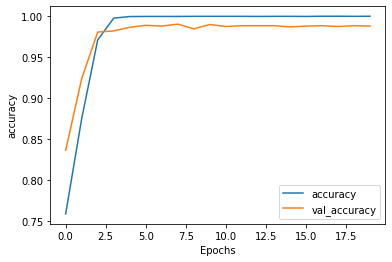

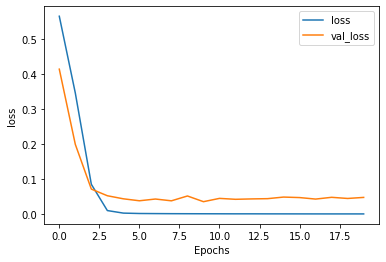


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.759181 	   0.565605 	   0.836646 	   0.414246
       2   0.875167 	   0.345999 	   0.923897 	   0.199187
       3   0.971034 	   0.084980 	   0.980611 	   0.071288
       4   0.997576 	   0.009864 	   0.982065 	   0.052262
       5   0.999515 	   0.002573 	   0.986428 	   0.043475
       6   0.999636 	   0.001484 	   0.988851 	   0.037872
       7   0.999636 	   0.001208 	   0.987882 	   0.042855
       8   0.999636 	   0.000955 	   0.990305 	   0.037745
       9   0.999758 	   0.000821 	   0.984489 	   0.051571
      10   0.999758 	   0.000726 	   0.989821 	   0.035279


In [97]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

65/65 [==============================] - 0s 6ms/step - loss: 0.0475 - accuracy: 0.9879
Test Loss: 0.04749269410967827
Test Accuracy: 0.9878817200660706 (Model Metric)
Test Accuracy: 0.9878817256422685 (sklearn Metric)
Test Precision: 0.9927710843373494
Test Recall: 0.9493087557603687
Test F1-score: 0.9705535924617196


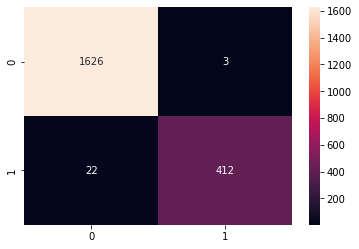

In [102]:
y_pred = model.predict(x_test)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(x_test, y_test, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(y_test, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(y_test, y_pred))
print('Test Recall:', recall_score(y_test, y_pred))
print('Test F1-score:', f1_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'g')